In [321]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [322]:
#Create a Model Class that inherts nn.module
class Model(nn.Module):
    #    Input Layer ( 4 features of a flower) -->
    # -> Hidden Layer ( Some no of neurons) -->
    # -> Output layer(3 Classes of Flower)

    def __init__(self , in_features = 4 , h1 = 8 , h2 = 9  , out_features = 3 ): 
        # Two hidden layers h1 , h2
        super().__init__() #instantiate our nn.Module
        self.fc1 = nn.Linear(in_features , h1)
        self.fc2 = nn.Linear(h1 , h2)
        self.out = nn.Linear(h2 , out_features)
        #fc1 and fc2 represent fully connected layers along with output which is also fullly connected

    def forward(self , x ):
        x = F.relu(self.fc1(x)) #relu : rectifier linear unit
        x = F.relu(self.fc2(x))
        x = F.relu(self.out(x))

        return x

In [323]:
# Seed Randomisation 
torch.manual_seed(41)
#Create an instance of our model
model = Model()

In [324]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [325]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [326]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [327]:
#Change vartiety coloumn to float values for training
my_df['variety'] = my_df['variety'].replace('Setosa' , 0.0 )
my_df['variety'] = my_df['variety'].replace('Versicolor' , 1.0 )
my_df['variety'] = my_df['variety'].replace('Virginica' , 2.0 )
my_df

C:\Users\ameyg\AppData\Local\Temp\ipykernel_14396\3429711300.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica' , 2.0 )


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [328]:
#Split data into train and test i.e X and Y respt.
X = my_df.drop('variety' , axis=1 )
Y = my_df['variety']

In [329]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [330]:
#CONVERT TO NUMPY ARRAYS
X = X.values
Y = Y.values

In [331]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [332]:
from sklearn.model_selection import train_test_split

In [333]:
#Train Test Split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state = 41)
#Sets test size 20% of the entire dataset randomly with seed 41

In [334]:
#Convert X features to flaot tensors ( 32 bit )
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [335]:
#Convert Y features to long tensors ( 64 bit )
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [336]:
model.parameters  #Model parameters for reference

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [337]:
#Set criterion of model to measure error
criterion = nn.CrossEntropyLoss()
#Using Adam optimizer
# here , lr = learning rate of the model
optimizer = torch.optim.Adam( model.parameters() , lr = 0.01 )

# TRAINING OUR MODEL

In [338]:
#Epochs : one run through all the training data
epoch = 100 
losses = []


In [339]:
for i in range(epoch):
    # Go forward and get a prediction
    Y_pred = model.forward(X_train)  #Ger predicted result

    # Measure loss ( will be high at first)
    loss = criterion(Y_pred , Y_train) # predicted values VS train value

    # Keep track of losses
    losses.append(loss.detach().numpy())

    # Print every 10 epochs
    if i % 10 == 0:
        print(f'Epoch: {i} and Loss: {loss}')

    #Back-Propogation ( To optimize results) 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch: 0 and Loss: 1.125203251838684
Epoch: 10 and Loss: 1.0097211599349976
Epoch: 20 and Loss: 0.8516881465911865
Epoch: 30 and Loss: 0.6555684804916382
Epoch: 40 and Loss: 0.45029523968696594
Epoch: 50 and Loss: 0.27184727787971497
Epoch: 60 and Loss: 0.15538781881332397
Epoch: 70 and Loss: 0.09336268901824951
Epoch: 80 and Loss: 0.06463459134101868
Epoch: 90 and Loss: 0.05066271126270294


# Graphing our losses

Text(0.5, 0, 'Epochs')

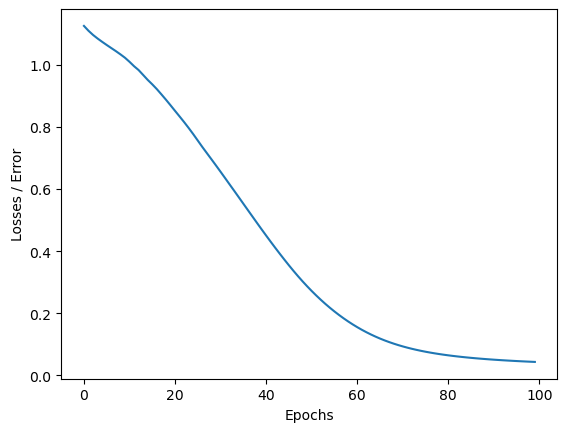

In [340]:
plt.plot(range(epoch) , losses)
plt.ylabel("Losses / Error")
plt.xlabel("Epochs")

# Evaluate Model on Test Data Set

In [341]:
with torch.no_grad(): #Turn off back propogation
    #We use the 20% set i.e test set we defined earlier
    Y_eval = model.forward(X_test) 

    #Fine the loss/error
    loss = criterion(Y_eval , Y_test)

In [342]:
loss #not great , it should be equal to previous train loss

tensor(0.1295)

In [343]:
correct = 0  # Variable to find how many predictions we got right

with torch.no_grad():
    for i , data in enumerate(X_test):
        Y_val = model.forward(data)
        
        # Will tell us the prediction of the neural network
        print(f'{i+1}.) {str(Y_val)}     \t {Y_test[i]}   \t {Y_val.argmax().item()}')
        #The highest number in each row is the prediction for that image

        #Correcrt OR not
        if Y_val.argmax().item() == Y_test[i]:
            correct += 1

    print(f'\nCorrect Predictions = {correct}')

1.) tensor([0.0000, 7.4447, 9.9152])     	 2   	 2
2.) tensor([ 0.0000,  7.7042, 14.3743])     	 2   	 2
3.) tensor([ 0.0000,  9.1280, 15.1753])     	 2   	 2
4.) tensor([0.2102, 8.3280, 4.5364])     	 1   	 1
5.) tensor([ 0.0000,  8.4035, 12.4779])     	 2   	 2
6.) tensor([1.6255, 8.0527, 1.9799])     	 1   	 1
7.) tensor([0.0000, 8.0659, 9.2757])     	 2   	 2
8.) tensor([0.3294, 8.4105, 4.3070])     	 1   	 1
9.) tensor([ 0.0000,  8.2367, 10.8423])     	 2   	 2
10.) tensor([ 0.0000,  8.1941, 15.2505])     	 2   	 2
11.) tensor([0.0000, 7.9806, 8.7350])     	 2   	 2
12.) tensor([8.9715, 3.4637, 0.0000])     	 0   	 0
13.) tensor([8.0554, 3.1741, 0.0000])     	 0   	 0
14.) tensor([2.2377, 6.4805, 0.4353])     	 1   	 1
15.) tensor([8.0202, 3.9148, 0.0000])     	 0   	 0
16.) tensor([0.0000, 8.1254, 8.0101])     	 2   	 1
17.) tensor([8.3626, 3.3009, 0.0000])     	 0   	 0
18.) tensor([0.0000, 7.6349, 9.5548])     	 1   	 2
19.) tensor([8.9383, 3.4532, 0.0000])     	 0   	 0
20.) t

# WE GOT 28 OUT OF 30 CORRECT

In [344]:
new_iris = torch.tensor([4.8,3.4,1.9,.2])

In [345]:
with torch.no_grad():
    print(model(new_iris))

tensor([8.1855, 3.4025, 0.0000])


Since 8.1855 is the biggest number , we can tell it is a Setosa

# Save our NN model

In [346]:
torch.save(model.state_dict() , 'iris_prediction_model.pt')

# Load the model

In [347]:
new_model = Model()
new_model.load_state_dict(torch.load('iris_prediction_model.pt'))

<All keys matched successfully>

In [348]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)